In [35]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## 보스턴 주택가격 회귀 문제

### 추정된 회귀계수의 신뢰도

In [5]:
import statsmodels.api as sm
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.head(3)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [12]:
result = sm.OLS(dfy, dfX).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 18 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        11:22:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

OLS 회귀분석 결과를 확인해보면 CRIM의 회귀계수 값이 -0.1080인 것을 확인할 수 있다.

즉, CRIM 피쳐가 종속변수에 음의 영향을 미친다는 것을 알 수 있다. 그런데 회귀계수값만을 놓고 본다면 추정한 회귀계수가 얼마나 신뢰성을 갖는지를 알 수 없다.

만약 -0.1080이라는 회귀계수의 오차가 1만 되더라도 CRIM은 사실 종속변수와 양의 상관관계가 있는 것이다. 

따라서 회귀분석을 통해 추정한 회귀계수의 값의 오차범위를 계산하는 방법으로 **부트스트래핑** 이라는 방법을 사용할 수 있다.

## 부트스트래핑

부트스트래핑(bootstrapping)은 회귀분석에 사용한 표본 데이터가 달라질 때 회귀분석의 결과가 얼마나 영향을 받는지 알기 위한 방법이다.

표본 데이터가 달라질 때 추정된 회귀계수의 값이 달라지는 것을 이용하여 다양한 데이터 셋을 이용해 회귀분석을 진행하면서 회귀분석의 오차를 짐작하는 방법이다.

하지만 새로운 데이터를 따로 수집하는 것으 쉽지 않기 때문에 부트스트래핑 방법은 기존에 회귀분석을 실시한 표본 데이터에서 일부를 resampling 하는 방법으로 회귀분석을 여러번 수행한다.

**(중복선택 가능)**

`make_regression()` 메소드를 이용해 테스트용 회귀분석용 데이터를 생성해서 부트스트래핑을 직접 수행해보자.

sample의 갯수는 100개, 독립변수는 하나, noise($\epsilon$)은 20, bias(y절편) = 0으로 놓고 회귀분석용 데이터를 생성한다.

In [13]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(
    n_samples = 100, n_features = 1, noise = 20, coef=True
)

In [30]:
# 실제 X1의 가중치

coef

array(91.10242534)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


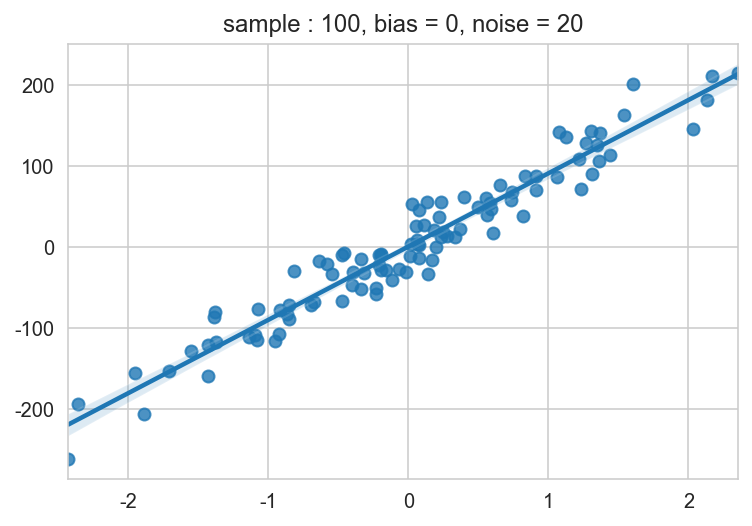

In [26]:
sns.regplot(X0, y)
plt.title('sample : 100, bias = 0, noise = 20')
plt.show()

In [28]:
dfX0 = pd.DataFrame(X0, columns=['X1'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=['y'])

model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1439.
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           2.18e-60
Time:                        11:41:03   Log-Likelihood:                -457.07
No. Observations:                 100   AIC:                             918.1
Df Residuals:                      98   BIC:                             923.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5178      2.362      0.219      0.8

앞서 생성한 회귀분석용 데이터를 이용해 회귀분석을 진행한 결과 **const가 0.5178, X1이 90.4203이 추정**되었다.

In [31]:
result.params

const     0.517838
X1       90.420297
dtype: float64

하지만 실제 **const(y절편)은 0**, **X1에 대한 가중치는 91.10242534** 이다.

이처럼 회귀분석의 결과는 정확한 정답이 아닌 근삿값을 구하게 되는데 추정한 가중치, 상수항의 오차범위를 알기 위해 아래의 방법으로 부트스트래핑을 진행한다.

numpy의 `random.choice()` 메소드를 이용해 데이터를 resampling 하여 회귀분석을 1000번 진행하고 그 결과인 $w_0, w_1$을 리스트로 저장한다.

In [32]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

Wall time: 1.06 s


1000번의 resampling을 통해 회귀분석을 진행한 결과 다음의 분포를 가지는 $w_1, w_0$를 얻을 수 있다.

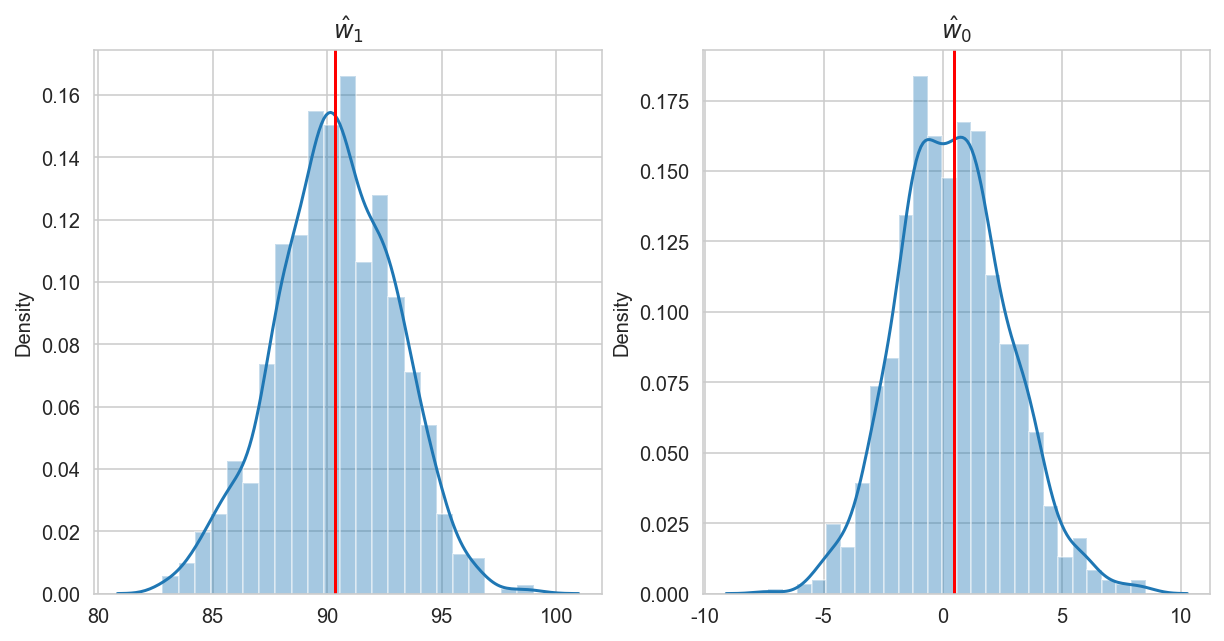

In [47]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$")
plt.show()

In [61]:
print(' w0의 평균 :',params_w0.mean(), '\n', 'w0의 표준편차' ,params_w0.std())

 w0의 평균 : 0.44741381987867207 
 w0의 표준편차 2.327301169462996


대부분의 데이터가 $0.4474\pm 4.6$ 사이에 있기 때문에 $w_0$는 양수, 0, 음수가 모두 가능성이 있는 값이된다.

In [60]:
print(' w1의 평균 :',params_w1.mean(), '\n', 'w1의 표준편차' ,params_w1.std())

 w1의 평균 : 90.35820410747459 
 w1의 표준편차 2.6057721854968867


대부분의 데이터가 $90.258 \pm 5.2$이기에 0이나 음수가 될 가능성은 매우 낮다.

위의 부트스트래핑 결과는 사실 OLS Regression Result로 확인할 수 있다.

In [62]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1439.
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           2.18e-60
Time:                        11:54:23   Log-Likelihood:                -457.07
No. Observations:                 100   AIC:                             918.1
Df Residuals:                      98   BIC:                             923.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5178      2.362      0.219      0.8

위 summary 결과에서 std err 부분이 바로 부트스트래핑으로 구한 표준편차와 유사한 값이 된다. 

그리고 0.025 ~ 0.975는 $\bar{x} \pm 2s$로 추정한 구간과 비슷한 값이 된다.

이 결과는 사실 부트스트래핑이 아닌 확률론적 선형회귀 모형으로 구한 것으로 부트스트래핑의 시간이 오래 걸린다는 단점을 보완하고 보다 안정적이라는 장점이 있다.